In [18]:
import pickle
import matplotlib.pyplot as plt

from pathlib import Path
from utils import tools
from datasets import supported_datamodules
from models import supported_models
from modules.pca_base_module import PCABaseModule

In [19]:
config_file = '../configs/pca/pca_standard_mnist.yaml'
config = tools.load_config(config_file)

Experimental parameters
------
{'data-parameters': {'root_data_path': '/home/brahste/Datasets/NoveltyMNIST'},
 'experiment-parameters': {'datamodule': 'NoveltyMNISTDataModule',
                           'log_dir': 'logs',
                           'model': 'StandardPCA'},
 'module-parameters': {'n_components': None}}


In [20]:
datamodule = supported_datamodules[config['experiment-parameters']['datamodule']](**config['data-parameters'])
x_test, y_test = datamodule.split(train=False)

with open('../logs/NoveltyMNISTDataModule/StandardPCA/version_3/fitted_model.p', 'rb') as f:
    model = pickle.load(f)
    
module = PCABaseModule(model)

In [21]:
test_novelty_scores = module.transform_pipeline(datamodule)

2021-04-19 18:05:59,906 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2021-04-19 18:05:59,907 - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
2021-04-19 18:05:59,908 - DEBUG - findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:05:59,908 - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
2021-04-19 18:05:59,908 - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
2021-04-19 18:05:59,909 - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
2021-04-19 18:05:59,909 - DEBUG - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:05:59,910 - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol

2021-04-19 18:05:59,936 - DEBUG - findfont: score(<Font 'Norasi' (Norasi-Oblique.ttf) oblique normal 400 normal>) = 11.05
2021-04-19 18:05:59,936 - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2021-04-19 18:05:59,937 - DEBUG - findfont: score(<Font 'Ubuntu' (Ubuntu-R.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:05:59,937 - DEBUG - findfont: score(<Font 'KacstDecorative' (KacstDecorative.ttf) normal normal 500 normal>) = 10.145
2021-04-19 18:05:59,937 - DEBUG - findfont: score(<Font 'Sarai' (Sarai.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:05:59,938 - DEBUG - findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-B.ttf) normal normal 700 normal>) = 10.335
2021-04-19 18:05:59,938 - DEBUG - findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:05:59,938 - DEBUG - findfont: score(<Font 'KacstTitle' (KacstTitle.ttf) normal normal 500 normal>) = 10.145
2021-04-19 18:05:59,939 - DEBUG

2021-04-19 18:05:59,967 - DEBUG - findfont: score(<Font 'Sawasdee' (Sawasdee.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:05:59,967 - DEBUG - findfont: score(<Font 'KacstQurn' (KacstQurn.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:05:59,967 - DEBUG - findfont: score(<Font 'Lato' (Lato-Heavy.ttf) normal normal 800 normal>) = 10.43
2021-04-19 18:05:59,968 - DEBUG - findfont: score(<Font 'Lohit Malayalam' (Lohit-Malayalam.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:05:59,968 - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal normal 700 condensed>) = 0.5349999999999999
2021-04-19 18:05:59,969 - DEBUG - findfont: score(<Font 'Tlwg Typo' (TlwgTypo-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
2021-04-19 18:05:59,969 - DEBUG - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:05:59,969 - DEBUG - findfont: score(<Font 'Kinnari' (Kinnari-Italic.ttf) italic normal 500 normal>) = 11.14

2021-04-19 18:06:00,000 - DEBUG - findfont: score(<Font 'Garuda' (Garuda.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:06:00,000 - DEBUG - findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:06:00,002 - DEBUG - findfont: score(<Font 'Bitstream Vera Serif' (VeraSeBd.ttf) normal normal 700 normal>) = 10.335
2021-04-19 18:06:00,003 - DEBUG - findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
2021-04-19 18:06:00,004 - DEBUG - findfont: score(<Font 'Bitstream Vera Sans Mono' (VeraMoBI.ttf) oblique normal 700 normal>) = 11.335
2021-04-19 18:06:00,004 - DEBUG - findfont: score(<Font 'Umpush' (Umpush-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
2021-04-19 18:06:00,004 - DEBUG - findfont: score(<Font 'AnjaliOldLipi' (AnjaliOldLipi.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:06:00,006 - DEBUG - findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal 

2021-04-19 18:06:00,025 - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:06:00,026 - DEBUG - findfont: score(<Font 'FreeSans' (FreeSansBold.ttf) normal normal 600 normal>) = 10.24
2021-04-19 18:06:00,026 - DEBUG - findfont: score(<Font 'Samyak Gujarati' (Samyak-Gujarati.ttf) normal normal 500 normal>) = 10.145
2021-04-19 18:06:00,026 - DEBUG - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.335
2021-04-19 18:06:00,027 - DEBUG - findfont: score(<Font 'Samanata' (samanata.ttf) normal normal 400 normal>) = 10.05
2021-04-19 18:06:00,027 - DEBUG - findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-RI.ttf) italic normal 400 normal>) = 11.05
2021-04-19 18:06:00,027 - DEBUG - findfont: score(<Font 'Loma' (Loma-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
2021-04-19 18:06:00,028 - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal

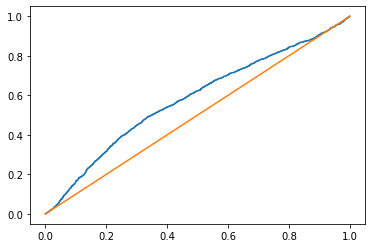

Model ROC AUC:  0.581431375
Random ROC AUC:  0.5


In [22]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_novelty_scores)
roc_auc_score = metrics.roc_auc_score(y_test, test_novelty_scores)
roc_auc_score_rand = metrics.roc_auc_score([*[0.]*400, *[1.]*400], [0.5]*800)

plt.plot(fpr, tpr)
plt.plot([0., 1.], [0., 1.])
plt.show()
print('Model ROC AUC: ', roc_auc_score)
print('Random ROC AUC: ', roc_auc_score_rand)